# Algoritmo de Shor utilizando a QFT semi-classica

In [23]:
import qiskit
from qiskit import *
from qiskit.visualization import *
import numpy as np

In [24]:
from qiskit import Aer, execute
simulator = Aer.get_backend('qasm_simulator')
from qiskit.visualization import plot_histogram

In [25]:
q_med1 = QuantumCircuit(1,1)
q_med1.measure(0,0)

q_med2 = QuantumCircuit(1,1)
q_med2.measure(0,0)

q_med3 = QuantumCircuit(1,1)
q_med3.measure(0,0)

# definição dos operadores controlados

qc1 = QuantumCircuit(4)
#a^4mod15 - vazio
qc1.x(0)
qc1.x(0)
U1 = qc1.to_gate().control(1)


qc2 = QuantumCircuit(4)
#a^2mod15
qc2.x(1)
qc2.x(3)
U2 = qc2.to_gate().control(1)


qc3 = QuantumCircuit(4)
#a^1mod15
qc3.swap(0,1)
qc3.swap(2,3)
U3 = qc3.to_gate().control(1)


from math import*
from qiskit.quantum_info.operators import Operator

r0pi2 = np.matrix([[1j,0],[0,1]])
r0pi4 = np.matrix([[1/sqrt(2)+1j/sqrt(2) ,0],[0,1]])


In [26]:
num_it = 16
for i in range(num_it):
    qc = QuantumCircuit(5,1) #circuito geral
    qc.x(4)
    qc.barrier()
    
    #início da primeira parte 
    qc.h(0)
    qc.append(U1, [0,1,2,3,4])
    qc.h(0)
    qc = qc.compose(q_med1)
    #fim da primeira parte
    
    #executa a primeira medida no simulador
    counts1 = execute(qc, backend=simulator, shots=1).result().get_counts(qc)
    
    
    #inicio da segunda parte
    qc.reset(0)
    qc.h(0)
    qc.append(U2, [0,1,2,3,4])
    
    if counts1['0']:
        qc.unitary(Operator(r0pi2), range(1), label='R0pi/2')
    elif counts1['1']:
        qc.u1(np.pi/2, 0)
            
    qc.h(0)
    qc = qc.compose(q_med2)
    # fim da segunda parte
    
    #executa a segunda medida no simulador
    counts2 = execute(qc, backend=simulator, shots=1).result().get_counts(qc)
    
    #inicio da terceira parte
    qc.reset(0)
    qc.h(0)
    qc.append(U3, [0,1,2,3,4])

    if (counts2 == {'0': 1}):    
        qc.unitary(Operator(r0pi2), range(1), label='R0pi/2')
    elif (counts2 == {'1': 1}):
        qc.u1(np.pi/2, 0)

    if (counts1 == {'0': 1}):
        qc.unitary(Operator(r0pi4), range(1), label='R0pi/4')
    elif (counts1 == {'1': 1}):
        qc.u1(np.pi/4, 0)

    qc.h(0)
    qc = qc.compose(q_med3)
    #fim da terceira parte
    
    #executa a terceira medida no simulador
    counts3 = execute(qc, backend=simulator, shots=1).result().get_counts(qc)
    
    
    print(counts3.keys(), counts2.keys(), counts1.keys())
    
    

dict_keys(['1']) dict_keys(['1']) dict_keys(['0'])
dict_keys(['1']) dict_keys(['1']) dict_keys(['0'])
dict_keys(['0']) dict_keys(['0']) dict_keys(['0'])
dict_keys(['1']) dict_keys(['1']) dict_keys(['0'])
dict_keys(['1']) dict_keys(['1']) dict_keys(['0'])
dict_keys(['0']) dict_keys(['0']) dict_keys(['0'])
dict_keys(['1']) dict_keys(['0']) dict_keys(['0'])
dict_keys(['0']) dict_keys(['0']) dict_keys(['0'])
dict_keys(['0']) dict_keys(['0']) dict_keys(['0'])
dict_keys(['0']) dict_keys(['1']) dict_keys(['0'])
dict_keys(['1']) dict_keys(['1']) dict_keys(['0'])
dict_keys(['0']) dict_keys(['0']) dict_keys(['0'])
dict_keys(['1']) dict_keys(['1']) dict_keys(['0'])
dict_keys(['0']) dict_keys(['0']) dict_keys(['0'])
dict_keys(['1']) dict_keys(['1']) dict_keys(['0'])
dict_keys(['0']) dict_keys(['0']) dict_keys(['0'])


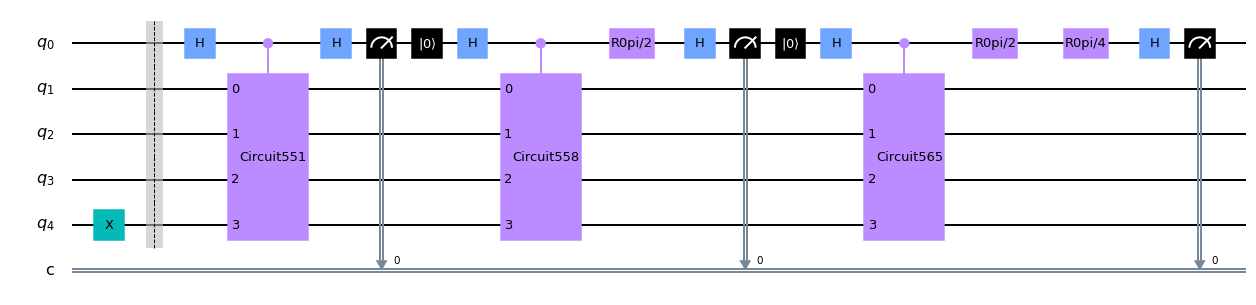

In [29]:
qc.draw(output='mpl', fold=-1)